# SUMMARY

**Requirements**

Gather and prepare your data using the requests library.
  - I gathered data using request, save them as csv files and used global library to add all the files for each subreddit csv. I created two dataframes for each subreddit then later added them to one dataframe. See below Data Gathering section for my data gathering process.
 
Create and compare two classifier models. 
  - As mandatory requirement, I created a Random Forest Classifier model and optimized with the n-estimator, and using cross validation. I also created an Extra Trees Classifier to see if I can improve the score. Lastly, I created with Multinomial Naive Bayes classifier models in where I tried it both with CountVectorizer and TFIDVectorizer to see the difference. I optimized this by creating Pipeline and Gridsearch with best parameters.

Jupyter Notebook with your analysis for a peer audience of data scientists. 
  - Please see notes and Evaluation for each model at the end.
  
An executive summary of your results.
  - Please see ReadMe.md file

A short presentation outlining your process and findings for a semi-technical audience.
  - Please see A_Tale_of_Two_subreddits_through_NLP.pdf file.



In [2]:
import requests
import numpy as np
import pandas as pd

In [367]:
url = 'https://api.pushshift.io/reddit/search/submission'

# DATA GATHERING

Building the data gathering code...

In [286]:
#create a helper function to get data from a set of params/subreddit
def get_data (params):
    df = []
    url = 'https://api.pushshift.io/reddit/search/submission'
    
    for i in range (0,35):
        response = requests.get(url, params) #request
        response.status_code
        
        
        if response.status_code == 200:
            data= response.json()
            posts = data['data']
            
            df = pd.DataFrame(posts)
            df = df[['subreddit','author','id','title','selftext','created_utc']]
        
            reddit=params['subreddit']
            df.to_csv(f'{reddit}{i}.csv', index=False) 
            
            created_utc = df['created_utc'].min() #restart the loop before the last minimum date-time stamp
            params['before'] = created_utc
            
        else:
            print ('Request Failed')
            return

# First Subreddit:  r/Coffee

In [106]:
cd subreddit1

/Users/Pineapplebook/Documents/DSI/dsir-125/projects/project-03-main/subreddit1


In [295]:
params = { 
    'subreddit' : 'coffee',
    'size' : 100,
    #'sort_type':'created_utc'
    
}
get_data(params) 

In [296]:
import glob #using global library to find pattern/csv files
all_filenames = [i for i in glob.glob('*.{}'.format('csv'))] #to get all csv files in the current directory

In [ ]:
#combining all first subreddit data into one csv
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "SUBREDDIT1.csv", index=False)  #CHECK DATA USING GOOGLE SHEETS. 

In [6]:
cd

/Users/Pineapplebook/Documents/DSI/dsir-125/projects/project-03-main/subreddit1


In [107]:
coffee = pd.read_csv('./SUBREDDIT1.csv')
coffee.head()

,subreddit,author,id,title,selftext,created_utc
0,Coffee,AfternoonMoss,lfg46z,My coffee once grounded smells... really bad,I've got some smaller bags of specialty coffee...,1612803407
1,Coffee,arron_sh,lffmad,Do you all have coffee machine at home?,The good coffee machines are expensive. Do you...,1612802097
2,Coffee,hassoumi,lffa97,Refractometer advice needed,"Dear coffee community,\nI have been looking fo...",1612801178
3,Coffee,hospitality883,lff7ew,La Marzocco Strada 2Grp electricity use,So the Strada is around 4700watts in technical...,1612800968
4,Coffee,fallswithsissors,lfeocw,Monday morning “pre-coffee” me wondering why c...,NaN,1612799563


In [108]:
coffee.isnull().sum()

subreddit        0
author           0
id               0
title            0
selftext       928
created_utc      0
dtype: int64

In [109]:
#using selftext as NLP feature so drop rows that has NaN and get more data
coffee = coffee.dropna() 
coffee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2572 entries, 0 to 3499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subreddit    2572 non-null   object
 1   author       2572 non-null   object
 2   id           2572 non-null   object
 3   title        2572 non-null   object
 4   selftext     2572 non-null   object
 5   created_utc  2572 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 140.7+ KB


# Second Reddit: r/Tea

In [110]:
cd ../subreddit2

/Users/Pineapplebook/Documents/DSI/dsir-125/projects/project-03-main/subreddit2


In [431]:
mkdir subreddit2 #directory for data files

mkdir: subreddit2: File exists


In [304]:
#Getting 2nd subreddit data
params = { 
    'subreddit' :'tea',
    'size' : 100
}
get_data(params)

In [305]:
#all csv in dir to all_filenames
all_filenames = [i for i in glob.glob('*.{}'.format('csv'))]
#combining all second subreddit data into one csv
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "SUBREDDIT2.csv", index=False) 

In [111]:
tea = pd.read_csv('./SUBREDDIT2.csv')
tea.head()

,subreddit,author,id,title,selftext,created_utc
0,tea,hannah_kk,ly3byp,"This is a kind of oolong tea called ""Rou Gui""",NaN,1614916310
1,tea,LuckiestPierre69,ly2q03,What’s the best way to clean the small slots i...,NaN,1614914227
2,tea,Icy_Seaworthiness176,lxz2rk,Some rose milk tea at a local tea place,NaN,1614902452
3,tea,MemeMaven,lxyj07,How do you brew boricha?,I've been winging it so far but I feel that I'...,1614900765
4,tea,kevcorms,lxyhy8,My first order finally arrived !,NaN,1614900676


In [112]:
tea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subreddit    3500 non-null   object
 1   author       3500 non-null   object
 2   id           3500 non-null   object
 3   title        3500 non-null   object
 4   selftext     1663 non-null   object
 5   created_utc  3500 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 164.2+ KB


In [113]:
#using selftext as NLP feature so drop rows that has NaN and get more data
tea = tea.dropna() 
tea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 3 to 3499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subreddit    1663 non-null   object
 1   author       1663 non-null   object
 2   id           1663 non-null   object
 3   title        1663 non-null   object
 4   selftext     1663 non-null   object
 5   created_utc  1663 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 90.9+ KB


In [114]:
coffee.drop(columns=['id','created_utc'], inplace=True)
tea.drop(columns=['id','created_utc'], inplace=True)

# Exploratory Data Analysis

In [115]:
#NLP EDA Starter Imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.feature_extraction.text import CountVectorizer

In [116]:
#Adding a word count feature
coffee['statuslength'] = coffee['selftext'].str.len()
tea['statuslength'] = tea['selftext'].str.len()

In [117]:
tea.head()

,subreddit,author,title,selftext,statuslength
3,tea,MemeMaven,How do you brew boricha?,I've been winging it so far but I feel that I'...,353
5,tea,[deleted],The misty rain which making a hot pot of tea. ...,[deleted],9
6,tea,Usualus,Have any of you nerds roasted your rolled oolo...,"I see one blog post on the google about this, ...",317
7,tea,AAAAGentleman,What are the best teas for hard water?,"Living in the Eastern region of England, the w...",163
8,tea,[deleted],"Weird shape when I burned my hand by putting ""...",[deleted],9


In [118]:
(tea['author'] == '[deleted]').value_counts() #checking deleted accounts because I want to see the number of post per user later

False    1593
True       70
Name: author, dtype: int64

In [119]:
(coffee['author'] == '[deleted]').value_counts() #checking deleted accounts

False    2487
True       85
Name: author, dtype: int64

In [120]:
(tea['author'] == 'AutoModerator').value_counts() #checking non-user type of posts. Irrelevant posts for reaching the goal.

False    1587
True       76
Name: author, dtype: int64

In [121]:
(coffee['author'] == 'AutoModerator').value_counts()

False    2572
Name: author, dtype: int64

In [122]:
#dropping rows with deleted author values
tea = tea[tea['author'] != '[deleted]']
coffee = coffee[coffee['author'] != '[deleted]']

In [123]:
#dropping rows with removed selftext values because that's where I'll be taking the words for the NLP ML
tea = tea[tea['selftext'] != '[removed]']
coffee = coffee[coffee['selftext'] != '[removed]']

In [124]:
tea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363 entries, 3 to 3499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subreddit     1363 non-null   object
 1   author        1363 non-null   object
 2   title         1363 non-null   object
 3   selftext      1363 non-null   object
 4   statuslength  1363 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 63.9+ KB


In [125]:
#dropping Auto Moderator posts
tea = tea[tea['author'] != 'AutoModerator']

In [126]:
(tea['author'] == 'AutoModerator').value_counts() 

False    1287
Name: author, dtype: int64

In [127]:
#unique users
coffee['author'].value_counts().sum()

2026

In [128]:
tea['author'].value_counts().sum()

1287

In [129]:
#max no. of post of a r/tea user
tea['author'].value_counts().max()

10

In [130]:
#min no. of post of a r/tea user
tea['author'].value_counts().min()

1

In [131]:
#max no. of post of a r/coffee user
coffee['author'].value_counts().max()

60

In [132]:
#min no. of post of a r/coffee user
coffee['author'].value_counts().min()

1

In [133]:
coffee['author'].value_counts().mean()

1.1491775382870109

In [134]:
tea['author'].value_counts().mean()

1.21759697256386

In [ ]:
###drop duplicate author unique_users.drop_duplicates('#AUTHID', inplace=True)

In [135]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 3499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subreddit     2026 non-null   object
 1   author        2026 non-null   object
 2   title         2026 non-null   object
 3   selftext      2026 non-null   object
 4   statuslength  2026 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 95.0+ KB


In [136]:
#Making the dataframes even to reduce bias on subreddit feature
coffee =  coffee.drop(coffee.tail(2026-1287).index) 

In [137]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 2386
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subreddit     1287 non-null   object
 1   author        1287 non-null   object
 2   title         1287 non-null   object
 3   selftext      1287 non-null   object
 4   statuslength  1287 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 60.3+ KB


In [138]:
#add word count column
tea['statuswordcount'] = tea['selftext'].str.split().str.len()
coffee['statuswordcount'] = coffee['selftext'].str.split().str.len()

In [143]:
tea['statuswordcount'].mean() #average wordcount/post

84.43356643356644

In [142]:
coffee['statuswordcount'].mean()

115.53613053613054

**Longest and Shortest Posts** based on word count.

In [139]:
coffee.nlargest(5, ['statuswordcount']) 

,subreddit,author,title,selftext,statuslength,statuswordcount
311,Coffee,_hanif,Exercise to Train Your Coffee Tasting (Without...,TL;DR (it's a looong one): Eat your fruits. \n...,9342,1574
2241,Coffee,Robdiesel_dot_com,I love my Philips LatteGo 3200 (the one with t...,Repost: I think I messed up by including a lin...,5533,1032
2248,Coffee,Robdiesel_dot_com,I love my Philips LatteGo 3200 (the one with t...,This is basically a cut &amp; paste from what ...,5556,1031
1250,Coffee,Jaywalkas,Bad Experience With Whole Latte Love,\n\n&amp;#x200B;\n\nI wanted to share my exp...,4539,846
2269,Coffee,Vicosku,Roast Level Perspective from 1975 Book,"I found an old book titled, ""[The Book of Coff...",5169,846


In [144]:
coffee.nsmallest(5, ['statuswordcount']) 

,subreddit,author,title,selftext,statuslength,statuswordcount
1696,Coffee,bighalsy,Looking for the best budget grinder. I was thi...,thanks,6,1
2195,Coffee,theBigDaddio,The life cycle of a cup of coffee - A.J. Jacobs,[https://youtu.be/M0VWroX0gZA](https://youtu.b...,60,1
2163,Coffee,ndGall,Is decent drip coffee even possible?,"If so, how?",11,3
2300,Coffee,barneyfife104,Does anyone know where to purchase BOSS Coffee...,Can’t find it anywhere!,23,4
245,Coffee,motsanciens,Power is out and roads are icy. With a French ...,"Yeah, I'm a little desperate",28,5


In [145]:
tea.nlargest(5, ['statuswordcount']) 

,subreddit,author,title,selftext,statuslength,statuswordcount
2843,tea,11001001000011111101,The underrated importance of water,*NOTE: this post is solely addressed at those ...,9167,1470
335,tea,dohrey,Crowd sourcing a comprehensive guide to tea fr...,For people who buy higher end teas I think it ...,5885,1003
2285,tea,day_break,Lapsang Store Samples Part 1,This is part 1 of me trying samples I got at [...,4639,822
1025,tea,dailyteas,Daily Teas #8 &amp; #9,Things will be a little different this time si...,4509,759
1232,tea,Abkenn,My first What-Cha arrived + images (Yunnan sna...,&amp;#x200B;\n\n[What-Cha order](https://previ...,3973,677


In [146]:
tea.nsmallest(5, ['statuswordcount']) 

,subreddit,author,title,selftext,statuslength,statuswordcount
1544,tea,frtzyyyy,Do I use 2 tea bags for my 13floz tea tumbler?,???,3,1
447,tea,natnatnat1234,Happy Lunar New Year!,&amp;#x200B;\n\nhttps://preview.redd.it/wuvt3e...,143,2
1080,tea,sprlte,Bought these things. Good things for cold brew...,&amp;#x200B;\n\nhttps://preview.redd.it/melr1s...,141,2
1095,tea,Crazy-Edge-3086,Online tea store with free worldwide shipping,Any recommendations?,20,2
1129,tea,RommelWellington,Do you drink tea with...,\n\n[View Poll](https://www.reddit.com/poll/l8...,49,2


**Distribution of Post Lengths**

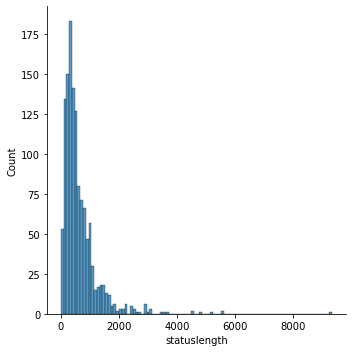

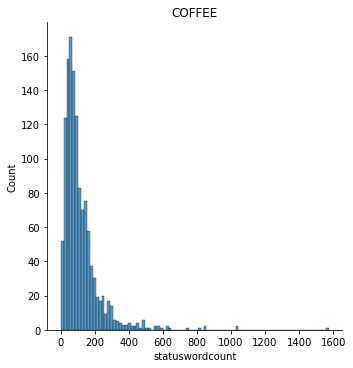

In [147]:
sns.displot(coffee, x='statuslength')
sns.displot(coffee, x='statuswordcount')
plt.title('COFFEE');

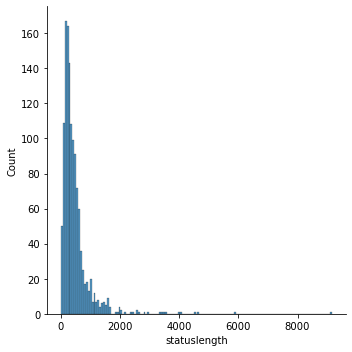

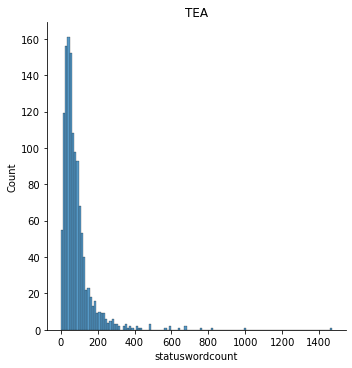

In [148]:
sns.displot(tea, x='statuslength')
sns.displot(tea, x='statuswordcount')
plt.title('TEA');

**PREPROCESSING**

In [149]:
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import nltk

Removal of Special Characters

In [150]:
tea.tail()

,subreddit,author,title,selftext,statuslength,statuswordcount
3491,tea,da_real_gman,Any pointers?,Never really tried tea till about 3 weeks ago ...,214,43
3494,tea,madmix27,"People who drink tea with lemon, how you do it?","Hey, how you prepare your tea with lemon:\n\n*...",330,65
3495,tea,adfjj123nb,Canadian online tea sellers,Can anyone recommend good online tea sellers i...,169,27
3496,tea,xcleru,What's the best beginner's set up for drinking...,I became fascinated with tea lately and have b...,479,82
3499,tea,LOLraul1335,Do you add sugar or honey to your tea/chai?,"If you have the time, explain why you do/don't...",96,11


In [151]:
#removal of special characters
tea['text'] = tea['selftext'].map(lambda x: re.sub(r'\W+', ' ', x))
coffee['text'] = coffee['selftext'].map(lambda x: re.sub(r'\W+', ' ', x))

In [152]:
tea.tail()

,subreddit,author,title,selftext,statuslength,statuswordcount,text
3491,tea,da_real_gman,Any pointers?,Never really tried tea till about 3 weeks ago ...,214,43,Never really tried tea till about 3 weeks ago ...
3494,tea,madmix27,"People who drink tea with lemon, how you do it?","Hey, how you prepare your tea with lemon:\n\n*...",330,65,Hey how you prepare your tea with lemon Slice ...
3495,tea,adfjj123nb,Canadian online tea sellers,Can anyone recommend good online tea sellers i...,169,27,Can anyone recommend good online tea sellers i...
3496,tea,xcleru,What's the best beginner's set up for drinking...,I became fascinated with tea lately and have b...,479,82,I became fascinated with tea lately and have b...
3499,tea,LOLraul1335,Do you add sugar or honey to your tea/chai?,"If you have the time, explain why you do/don't...",96,11,If you have the time explain why you do don t ...


In [153]:
coffee.head()

,subreddit,author,title,selftext,statuslength,statuswordcount,text
0,Coffee,AfternoonMoss,My coffee once grounded smells... really bad,I've got some smaller bags of specialty coffee...,719,126,I ve got some smaller bags of specialty coffee...
1,Coffee,arron_sh,Do you all have coffee machine at home?,The good coffee machines are expensive. Do you...,67,10,The good coffee machines are expensive Do you ...
2,Coffee,hassoumi,Refractometer advice needed,"Dear coffee community,\nI have been looking fo...",374,65,Dear coffee community I have been looking for ...
3,Coffee,hospitality883,La Marzocco Strada 2Grp electricity use,So the Strada is around 4700watts in technical...,188,37,So the Strada is around 4700watts in technical...
5,Coffee,Pijatt,[Advice needed] Delonghi dedica frothing milk ...,"Hi guy, I recently owned the Deloghi Dedica. B...",407,72,Hi guy I recently owned the Deloghi Dedica Bee...


Tokenize

In [154]:
tea['tokenized_sents'] = tea.apply(lambda row: nltk.word_tokenize(row['text'].lower()), axis=1)

In [155]:
coffee['tokenized_sents'] = coffee.apply(lambda row: nltk.word_tokenize(row['text'].lower()), axis=1)

In [156]:
tea.head()

,subreddit,author,title,selftext,statuslength,statuswordcount,text,tokenized_sents
3,tea,MemeMaven,How do you brew boricha?,I've been winging it so far but I feel that I'...,353,69,I ve been winging it so far but I feel that I ...,"[i, ve, been, winging, it, so, far, but, i, fe..."
6,tea,Usualus,Have any of you nerds roasted your rolled oolo...,"I see one blog post on the google about this, ...",317,57,I see one blog post on the google about this b...,"[i, see, one, blog, post, on, the, google, abo..."
7,tea,AAAAGentleman,What are the best teas for hard water?,"Living in the Eastern region of England, the w...",163,32,Living in the Eastern region of England the wa...,"[living, in, the, eastern, region, of, england..."
9,tea,superzebra109,H&amp;S Irish Breakfast Tea help?,"Hi, I'm kinda new to this group and to tea. I'...",1136,229,Hi I m kinda new to this group and to tea I ve...,"[hi, i, m, kinda, new, to, this, group, and, t..."
10,tea,pin_920,Chaga Tea Suggestions,Does anyone know of a good Chaga powder or pro...,101,17,Does anyone know of a good Chaga powder or pro...,"[does, anyone, know, of, a, good, chaga, powde..."


Lemmatizing

In [157]:
# Instantiate lemmatizer.
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [158]:
#Creating a helper function for Lemmatizing
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [159]:
tea['text_lemmatized'] = tea.text.apply(lemmatize_text)

In [160]:
coffee['text_lemmatized'] = coffee.text.apply(lemmatize_text)

In [161]:
tea.head()

,subreddit,author,title,selftext,statuslength,statuswordcount,text,tokenized_sents,text_lemmatized
3,tea,MemeMaven,How do you brew boricha?,I've been winging it so far but I feel that I'...,353,69,I ve been winging it so far but I feel that I ...,"[i, ve, been, winging, it, so, far, but, i, fe...","[I, ve, been, winging, it, so, far, but, I, fe..."
6,tea,Usualus,Have any of you nerds roasted your rolled oolo...,"I see one blog post on the google about this, ...",317,57,I see one blog post on the google about this b...,"[i, see, one, blog, post, on, the, google, abo...","[I, see, one, blog, post, on, the, google, abo..."
7,tea,AAAAGentleman,What are the best teas for hard water?,"Living in the Eastern region of England, the w...",163,32,Living in the Eastern region of England the wa...,"[living, in, the, eastern, region, of, england...","[Living, in, the, Eastern, region, of, England..."
9,tea,superzebra109,H&amp;S Irish Breakfast Tea help?,"Hi, I'm kinda new to this group and to tea. I'...",1136,229,Hi I m kinda new to this group and to tea I ve...,"[hi, i, m, kinda, new, to, this, group, and, t...","[Hi, I, m, kinda, new, to, this, group, and, t..."
10,tea,pin_920,Chaga Tea Suggestions,Does anyone know of a good Chaga powder or pro...,101,17,Does anyone know of a good Chaga powder or pro...,"[does, anyone, know, of, a, good, chaga, powde...","[Does, anyone, know, of, a, good, Chaga, powde..."


Stop Word Removal

In [162]:
tea['raw_text']=tea['tokenized_sents'].apply(lambda x: [item for item in x if item not in stopwords.words('english')])

In [163]:
tea['raw_text'].head() #text with no stop words as a new column

3     [winging, far, feel, also, wasting, think, sup...
6     [see, one, blog, post, google, wanted, check, ...
7     [living, eastern, region, england, water, get,...
9     [hi, kinda, new, group, tea, lurking, bit, dec...
10    [anyone, know, good, chaga, powder, product, m...
Name: raw_text, dtype: object

In [164]:
coffee['raw_text']=coffee['tokenized_sents'].apply(lambda x: [item for item in x if item not in stopwords.words('english')])

####################################
stop_words_lst = ['stop','words','here']
s = "stop words here"

import re
for w in stop_words_lst:
    pattern = r'\b'+w+r'\b'
    s = re.sub(pattern, '', s)
    print (s)
###################################

In [165]:
coffee['raw_text'] #text with no stop words as a new column

0       [got, smaller, bags, specialty, coffee, lately...
1       [good, coffee, machines, expensive, recommenda...
2       [dear, coffee, community, looking, coffee, tds...
3       [strada, around, 4700watts, technical, paramet...
5       [hi, guy, recently, owned, deloghi, dedica, us...
                              ...                        
2380    [looking, electric, grinder, budget, max, 250,...
2381    [hi, coffee, lovers, using, delonghi, dedica, ...
2382    [hello, tried, different, brewing, methods, au...
2383    [hi, everyone, time, writing, read, posts, mok...
2386    [thought, explored, every, rabbit, hole, v60, ...
Name: raw_text, Length: 1287, dtype: object

Common Words

In [217]:
# Instantiate a CountVectorizer with the default hyperparameters.
cvec = CountVectorizer()
X1 = coffee['raw_text']

In [218]:
coffee['raw_text'] = coffee['raw_text'].astype(str) #changing data type

In [219]:
#Fit on text
cvec.fit(X1)

CountVectorizer()

In [209]:
#Convert to a dataframe and store
X1.tail()

2380    ['looking', 'electric', 'grinder', 'budget', '...
2381    ['hi', 'coffee', 'lovers', 'using', 'delonghi'...
2382    ['hello', 'tried', 'different', 'brewing', 'me...
2383    ['hi', 'everyone', 'time', 'writing', 'read', ...
2386    ['thought', 'explored', 'every', 'rabbit', 'ho...
Name: raw_text, dtype: object

In [220]:
X1 = cvec.transform(X1)

In [211]:
cvec.get_feature_names()[1000:1010]

['attacks',
 'attain',
 'attainable',
 'attempt',
 'attempted',
 'attempts',
 'attention',
 'attest',
 'attributes',
 'atypical']

In [212]:
X1.shape

(1287, 8621)

In [221]:
coffee_counts = pd.DataFrame(X1.toarray(),
                      columns=cvec.get_feature_names())
coffee_counts.T.sort_values(by=0, ascending=False).head(20) #word counts by index
coffee_counts.sum().sort_values(ascending=False).head(35) #this shows top 35 words to pull 10 meaningful words

coffee       2882
like          723
water         550
get           511
would         502
beans         491
grinder       473
use           442
grind         430
good          413
espresso      401
time          391
one           383
cup           380
know          358
machine       353
brew          349
make          335
really        311
much          301
https         292
anyone        277
using         275
com           266
also          263
want          255
new           251
amp           251
pour          246
something     242
taste         237
thanks        236
first         235
looking       233
www           228
dtype: int64

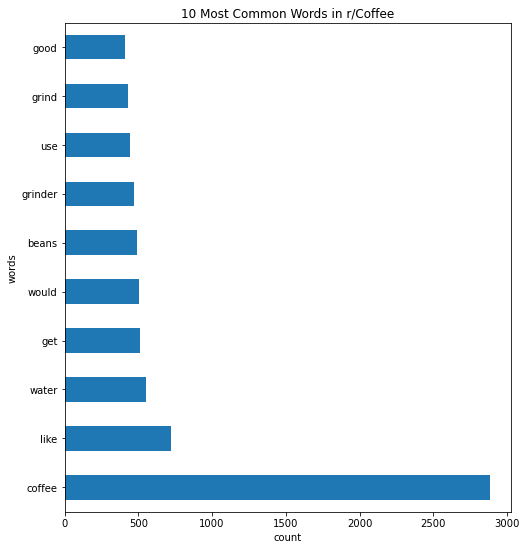

In [452]:
#Plotting Common Words

plt.figure(figsize=(8, 9))
coffee_counts.sum().sort_values(ascending=False).head(10).plot(kind='barh', title = "10 Most Common Words in r/Coffee")
plt.xlabel('count')
plt.ylabel ('words')
plt.show;

In [175]:
tea['raw_text'] = tea['raw_text'].astype(str) #changing data type

In [182]:
# Instantiate a CountVectorizer with the default hyperparameters.
cvec2 = CountVectorizer()
X2 = tea['raw_text']
#Fit on text
cvec2.fit(X2)
#transform data
X2 = cvec2.transform(X2)
X2.shape

(1287, 7805)

In [249]:
tea_counts = pd.DataFrame(X2.toarray(),
                      columns=cvec2.get_feature_names())
tea_counts.T.sort_values(by=0, ascending=False).head(30) #this shows the break down of word counts per index
tea_counts.sum().sort_values(ascending=False).head(40) #this shows top 40 words for insights

tea          2994
like          714
teas          600
would         392
amp           380
good          362
water         359
know          331
one           322
anyone        319
green         314
get           305
black         289
really        279
looking       257
also          254
https         239
loose         239
leaf          237
time          233
much          230
taste         224
want          223
tried         221
something     217
love          212
drink         208
use           206
find          204
try           196
thanks        191
first         176
make          176
different     172
even          166
com           165
got           161
drinking      160
brewing       158
brew          157
dtype: int64

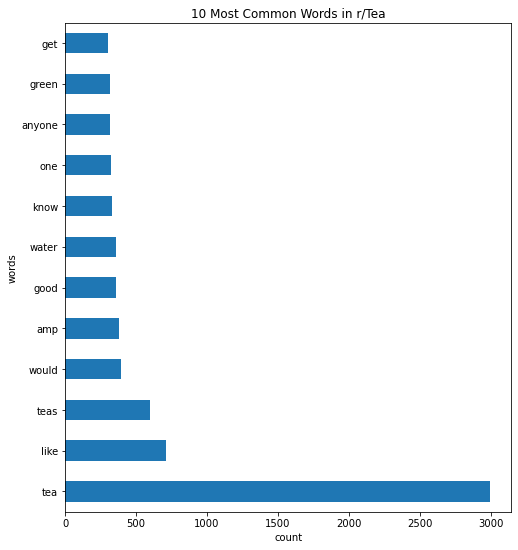

In [455]:
#Plotting Common Words

# plot top occuring words
plt.figure(figsize=(8, 9))
tea_counts.sum().sort_values(ascending=False).head(12).plot(kind='barh', title = "10 Most Common Words in r/Tea")
plt.xlabel('count')
plt.ylabel ('words')
plt.show;

In [250]:
frames = [coffee, tea] 
data_df = pd.concat(frames) #combining two dataframes

In [251]:
data_df.tail()

,subreddit,author,title,selftext,statuslength,statuswordcount,text,tokenized_sents,text_lemmatized,raw_text
3491,tea,da_real_gman,Any pointers?,Never really tried tea till about 3 weeks ago ...,214,43,Never really tried tea till about 3 weeks ago ...,"[never, really, tried, tea, till, about, 3, we...","[Never, really, tried, tea, till, about, 3, we...","['never', 'really', 'tried', 'tea', 'till', '3..."
3494,tea,madmix27,"People who drink tea with lemon, how you do it?","Hey, how you prepare your tea with lemon:\n\n*...",330,65,Hey how you prepare your tea with lemon Slice ...,"[hey, how, you, prepare, your, tea, with, lemo...","[Hey, how, you, prepare, your, tea, with, lemo...","['hey', 'prepare', 'tea', 'lemon', 'slice', 'l..."
3495,tea,adfjj123nb,Canadian online tea sellers,Can anyone recommend good online tea sellers i...,169,27,Can anyone recommend good online tea sellers i...,"[can, anyone, recommend, good, online, tea, se...","[Can, anyone, recommend, good, online, tea, se...","['anyone', 'recommend', 'good', 'online', 'tea..."
3496,tea,xcleru,What's the best beginner's set up for drinking...,I became fascinated with tea lately and have b...,479,82,I became fascinated with tea lately and have b...,"[i, became, fascinated, with, tea, lately, and...","[I, became, fascinated, with, tea, lately, and...","['became', 'fascinated', 'tea', 'lately', 'par..."
3499,tea,LOLraul1335,Do you add sugar or honey to your tea/chai?,"If you have the time, explain why you do/don't...",96,11,If you have the time explain why you do don t ...,"[if, you, have, the, time, explain, why, you, ...","[If, you, have, the, time, explain, why, you, ...","['time', 'explain', 'view', 'poll', 'https', '..."


In [252]:
# Instantiate a CountVectorizer with the default hyperparameters.
cvec3 = CountVectorizer()

In [253]:
X = data_df['raw_text']

In [254]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2574 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   subreddit        2574 non-null   object
 1   author           2574 non-null   object
 2   title            2574 non-null   object
 3   selftext         2574 non-null   object
 4   statuslength     2574 non-null   int64 
 5   statuswordcount  2574 non-null   int64 
 6   text             2574 non-null   object
 7   tokenized_sents  2574 non-null   object
 8   text_lemmatized  2574 non-null   object
 9   raw_text         2574 non-null   object
dtypes: int64(2), object(8)
memory usage: 221.2+ KB


In [255]:
data_df['raw_text'] = data_df["raw_text"].astype(str) #changing data type

In [293]:
X = data_df['raw_text'].astype(str)
y = data_df['subreddit']
y.value_counts()

Coffee    1287
tea       1287
Name: subreddit, dtype: int64

In [294]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [295]:
# Instantiate a CountVectorizer with the default hyperparameters.
cv = CountVectorizer()
# Fit the vectorizer on corpus.
cv.fit(X_train)
cv.fit(X_test)
# Transform the corpus.
X_train = cv.transform(X_train)
X_test = cv.transform(X_test)
cv.get_feature_names()[1000:1010]

['broaden',
 'broadened',
 'broadly',
 'broke',
 'broken',
 'brooklyn',
 'brother',
 'broths',
 'brought',
 'brown']

In [273]:
 #MATRIX REPRESENTATION
counts = pd.DataFrame(X_train.toarray(),
                      columns=cv.get_feature_names())

counts.T.sort_values(by=0, ascending=False).head(20) 

#Print top words from the matrix
counts.sum().sort_values(ascending=False).head(40) 

tea          2044
coffee       2022
like          978
water         641
would         621
get           575
good          533
one           491
amp           491
know          456
use           437
time          431
really        403
anyone        396
teas          377
cup           366
https         366
beans         358
much          355
also          352
grinder       347
make          347
brew          344
want          340
looking       331
taste         324
grind         318
tried         314
thanks        308
something     307
first         292
new           291
com           288
espresso      280
got           270
even          264
find          254
using         252
brewing       240
try           239
dtype: int64

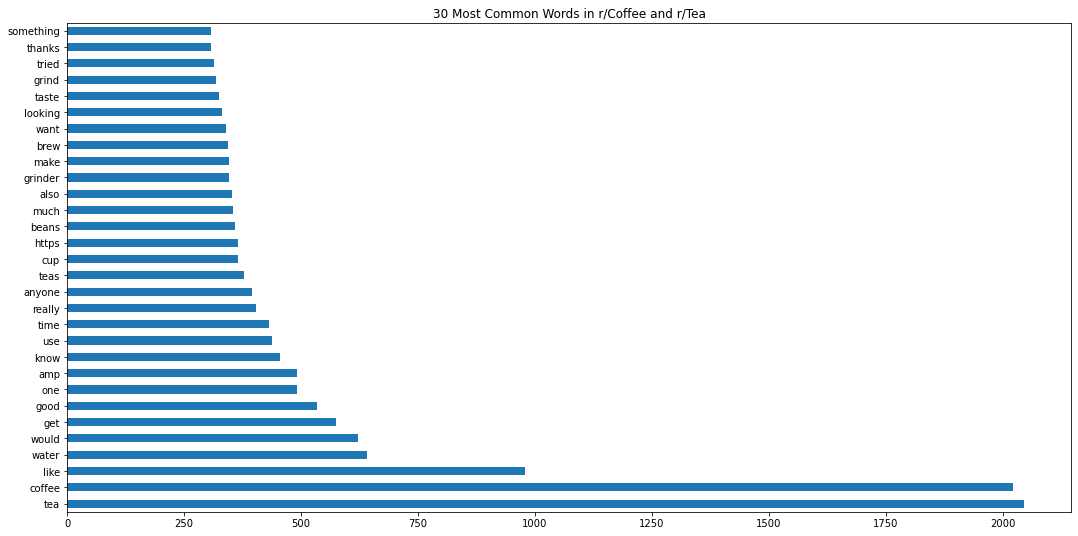

In [274]:
#Plotting Common Words

plt.figure(figsize=(18, 9))
counts.sum().sort_values(ascending=False).head(30).plot(kind='barh', title = "30 Most Common Words in r/Coffee and r/Tea")
plt.show;

**MODELING**

**1. RANDOM FOREST CLASSIFIER**

In [309]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [276]:
#instantiate the model
rf = RandomForestClassifier(n_estimators=100)
et = ExtraTreesClassifier(n_estimators=100)

In [297]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [298]:
y_pred_test = rf.predict(X_test)

In [310]:
accuracy_score(y_test, y_pred_test)

0.9482352941176471

In [312]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.950123019885406

In [313]:
cross_val_score(rf, X_test, y_test, cv=5).mean()

0.943529411764706

In [314]:
cross_val_score(rf, X_train, y_train, cv=10).mean() #it didn't get better

0.9483599946229333

In [317]:
#Another X and y for ExtraRandomTrees
X = data_df['raw_text'].astype(str)
y = data_df['subreddit']
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)
# Instantiate a CountVectorizer with the default hyperparameters.
cv = CountVectorizer()
# Fit the vectorizer on corpus.
cv.fit(X_train)
cv.fit(X_test)
# Transform the corpus.
X_train = cv.transform(X_train)
X_test = cv.transform(X_test)

In [318]:
et.fit(X_train, y_train)

ExtraTreesClassifier()

In [321]:
y_pred_test = et.predict(X_test)

In [322]:
accuracy_score(y_test, y_pred_test) #This is better than the RandomTreesClassifier

0.9564705882352941

In [323]:
cross_val_score(et, X_train, y_train, cv=5).mean()#Random Extra Trees for extra randomization and see if score improves

0.9419969666329626

In [324]:
cross_val_score(et, X_test, y_test, cv=5).mean() #This seems a little overfit than the RandomForestClassifier model.

0.9294117647058824

**EVALUATION**

The ExtraTreesClassifier() gave a better accuracy score of 95.65% vs RandomForestClassifier() with 94.82% 
but the model seems add some overfitting. This accuracy score measures how many labels the model got right out of the total number of predictions.






**2. Multinomial Naive Bayes with Optimization**

In [406]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline


In [409]:
#Define X and y
X = data_df['raw_text'].astype(str)
y = data_df['subreddit']
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [410]:
#instantiate and CountVectorize then fit in training data
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

# Fit your model
pipe.fit(X_train, y_train)

# Estimate how model will perform on unseen data
cross_val_score(pipe, X_train, y_train, cv=5).mean() 

0.9588203572632288

In [411]:
# Training score
pipe.score(X_train, y_train)

0.9895591647331786

In [412]:
#Predictions
y_preds = pipe.predict(X_test)

In [413]:
accuracy_score(y_test, y_pred_test)

0.9658823529411765

In [415]:
#Looks good, now to see if I can still optimize with the following parameters:

In [416]:
pipe_params = {
    'cvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95]
}

In [417]:
# Instantiate GridSearchCV.
gs = GridSearchCV(pipe, # optimizing pipe above
                  param_grid=pipe_params, # params above
                  cv=5) # 5-fold cross-validation.

In [418]:
# Fit GridSearch to training data.
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3]})

In [419]:
# Score NB model on training set.
gs.score(X_train, y_train)

0.9698375870069605

In [423]:
#Well this did not improved previous result.. Instead of CountVectorizer let me try TfidVectorizer

In [424]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Instantiate and fit this tfid.
tvec = TfidfVectorizer()

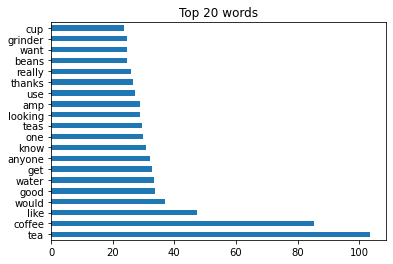

In [425]:
# convert data to vectorized dataframe
X_train_df = pd.DataFrame(tvec.fit_transform(X_train).todense(), 
                          columns=tvec.get_feature_names())
X_test_df = pd.DataFrame(tvec.fit_transform(X_test).todense(), 
                          columns=tvec.get_feature_names())


# plot top occuring words to check if anything's changed
X_train_df.sum().sort_values(ascending=False).head(20).plot(kind='barh', title = 'Top 20 words');

In [426]:
# Set up a pipeline Multinomial Naive Bayes Classifier and TfidVectorizer
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [427]:
#pipe params for optimization
pipe_tvec_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__stop_words': [None, 'english']
}

In [428]:
# Instantiate GridSearchCV 
gs_tvec = GridSearchCV(pipe_tvec, 
                        param_grid = pipe_tvec_params, 
                        cv=5) 

In [429]:
# Fit GridSearch to training data.
gs_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__stop_words': [None, 'english']})

In [431]:
# Score model on training set.
gs_tvec.score(X_train, y_train)

0.9820185614849188

In [432]:
# Score model on training set.
gs_tvec.score(X_test, y_test)

0.9588235294117647

In [430]:
#best params
gs_tvec.best_params_

{'tvec__max_features': 4000, 'tvec__stop_words': None}

In [438]:
#optimizing from above info 
pipe_tvec_params = {
    'tvec__max_features': [4_000],
    'tvec__stop_words': ['english']
}

In [439]:
# Instantiate GridSearchCV 
gs_tvec = GridSearchCV(pipe_tvec, 
                        param_grid = pipe_tvec_params, 
                        cv=5) 

# Fit GridSearch to training data.
gs_tvec.fit(X_train, y_train)

# Score model on training set.
gs_tvec.score(X_train, y_train)

0.9837587006960556

In [435]:
# Score model on training set.
gs_tvec.score(X_test, y_test)

0.9576470588235294

Confusion Matrix

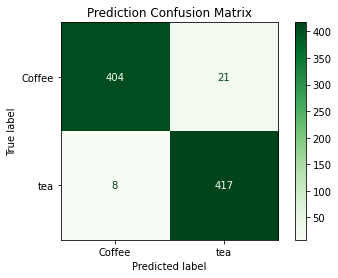

In [456]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
# Get predictions on the best scoring MultinomialNB 
preds = gs_tvec.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
# View confusion matrix

plot_confusion_matrix(gs, X_test, y_test, cmap='Greens', values_format='d')
plt.title ("Prediction Confusion Matrix")
plt.show;

In [446]:
# Calculate the specificity
acc = (tp + tn) / (tp + fp + tn + fn)
print('Accuracy:', acc)

Accuracy: 0.9576470588235294


**EVALUATION**

The Multinomial NB Classifier, with TFIDVectorizer, performed better than the rest of the other classifiers because I optimized it by using the best parameters on Pipeline and Gridsearch. Scores above shows some overfitting that happened but still acceptable.
This model have an accuracy score of 95.76% and the confusion matrix above is available to see the how many predictions we got correct, incorrect.

**CONCLUSION**

For this project, the Multinomial NB Classifier performed better than the rest of the other classifiers because I optimized it by using the best parameters on Pipeline and Gridsearch.

**NEXT STEPS**

Work with strings (n_grams) and setting a more subreddit channel focused stop-word dictionary.
